# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Final Project: Predicting Spotify Song Popularity


**Harvard University**<br/>
**Fall 2022**<br/>
**Rebecca Qiu & Amelia Li**

<hr style="height:2pt">



<a id="part1"></a>
## <div class='exercise'>Import Libraries</div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from tensorflow import keras
import warnings

%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)
warnings.filterwarnings("ignore")

2022-12-11 16:55:00.890725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<a id="part2"></a>
## <div class='exercise'>Data Preprocessing</div>

## Load data

In [2]:
df = pd.read_csv('data/SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
# check for missing values
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
# convert the duration of the songs from milliseconds to seconds
df["duration"] = df["duration_ms"].apply(lambda x:round(x/1000))
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,152
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,83


## Dealing with duplicates
There seems to be duplicate track_ids in the dataset, despite track_id being a unique key. Although the creator of the dataset didn't address this, we assume that the duplicates arose from a song having multiple genres, such as the track with the id '7zzZmpw8L66ZPjH1M6qmOs'.

In [6]:
df.nunique()

genre                   27
artist_name          14564
track_name          148615
track_id            176774
popularity             101
acousticness          4734
danceability          1295
duration_ms          70749
energy                2517
instrumentalness      5400
key                     12
liveness              1732
loudness             27923
mode                     2
speechiness           1641
tempo                78512
time_signature           5
valence               1692
duration              1310
dtype: int64

In [7]:
len(df)

232725

In [8]:
df[df['track_id'] == '7zzZmpw8L66ZPjH1M6qmOs']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
100080,Children’s Music,Moonstar88,Migraine,7zzZmpw8L66ZPjH1M6qmOs,67,0.217,0.664,267960,0.537,0.000003,D,0.118,-6.0,Major,0.029,115.049,4/4,0.221,268
142703,Indie,Moonstar88,Migraine,7zzZmpw8L66ZPjH1M6qmOs,67,0.217,0.664,267960,0.537,0.000003,D,0.118,-6.0,Major,0.029,115.049,4/4,0.221,268


In [9]:
df = df.drop_duplicates('track_id')

In [10]:
len(df)

176774

## Dealing with categorical data

### Convert 'time_signature' from string to int

In [11]:
def convert_to_float(s):
    return int(s.split('/')[0]) / int(s.split('/')[1])
df['time_signature'] = df['time_signature'].apply(convert_to_float)
df_categorical = df[['time_signature']]
df_categorical['popularity'] = df['popularity']

### One-Hot Encode 'mode'

In [12]:
mode = pd.get_dummies(df['mode'], prefix = 'Mode')

# drop the first hot-encoded column to avoid multicollinearity
mode = mode.drop(mode.columns[[0]], axis = 1)
df = pd.concat([df, mode], axis=1)

### Label encode 'key', C = 0, C# = 1, etc., >= 0, <= 11 [Web API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)

In [13]:
# unique keys in the dataset
df['key'].unique()

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

In [14]:
# map key to integer
key = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
df['key_int'] = [key[x] for x in df['key']]

In [15]:
### Check unique values for genre

In [16]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [17]:
# Fix "Children's Music", 'Children’s Music'
df = df.replace('Children’s Music', "Children's Music")

In [18]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

### One-Hot Encode 'genre'

In [19]:
genre = pd.get_dummies(df['genre'], prefix = 'Genre')
genre = genre.drop(genre.columns[[0]], axis = 1)
df = pd.concat([df, genre], axis = 1)

### Dealing with Outliers
According to the Spotify Web API, "time_signature" should be a value between 3/4 and 7/4 inclusive. However, there are "time_signature" values in our dataset with values 0 and 0.25. 

In [20]:
df['time_signature'].unique()

array([1.  , 1.25, 0.75, 0.25, 0.  ])

We decided to drop these values from our dataset as we are unable to interpret them.

In [21]:
df = df[df['time_signature'] >= 0.75]

In [22]:
# checking that values have been dropped
df[df['time_signature'] < 0.75]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration,Mode_Minor,key_int,Genre_Alternative,Genre_Anime,Genre_Blues,Genre_Children's Music,Genre_Classical,Genre_Comedy,Genre_Country,Genre_Dance,Genre_Electronic,Genre_Folk,Genre_Hip-Hop,Genre_Indie,Genre_Jazz,Genre_Movie,Genre_Opera,Genre_Pop,Genre_R&B,Genre_Rap,Genre_Reggae,Genre_Reggaeton,Genre_Rock,Genre_Ska,Genre_Soul,Genre_Soundtrack,Genre_World


## Final data

In [23]:
len(df)

174423

In [24]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration,Mode_Minor,key_int,Genre_Alternative,Genre_Anime,Genre_Blues,Genre_Children's Music,Genre_Classical,Genre_Comedy,Genre_Country,Genre_Dance,Genre_Electronic,Genre_Folk,Genre_Hip-Hop,Genre_Indie,Genre_Jazz,Genre_Movie,Genre_Opera,Genre_Pop,Genre_R&B,Genre_Rap,Genre_Reggae,Genre_Reggaeton,Genre_Rock,Genre_Ska,Genre_Soul,Genre_Soundtrack,Genre_World
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,1.00,0.814,99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,1.00,0.816,137,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,1.25,0.368,170,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,1.00,0.227,152,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,1.00,0.390,83,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df_numerical = df[['popularity', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 
                   'instrumentalness', 'loudness', 'tempo', 'valence', 'duration']]
df_numerical.head()

,popularity,acousticness,danceability,energy,liveness,speechiness,instrumentalness,loudness,tempo,valence,duration
0,0,0.611,0.389,0.910,0.3460,0.0525,0.000,-1.828,166.969,0.814,99
1,1,0.246,0.590,0.737,0.1510,0.0868,0.000,-5.559,174.003,0.816,137
2,3,0.952,0.663,0.131,0.1030,0.0362,0.000,-13.879,99.488,0.368,170
3,0,0.703,0.240,0.326,0.0985,0.0395,0.000,-12.178,171.758,0.227,152
4,4,0.950,0.331,0.225,0.2020,0.0456,0.123,-21.150,140.576,0.390,83


<a id="part3"></a>
## <div class='exercise'>EDA</div>

## Visualize the data

### Display distribution of popularity levels

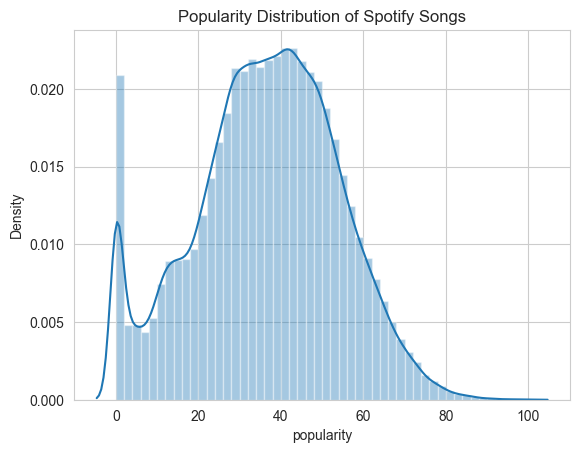

In [26]:
sns.distplot(df['popularity']).set_title('Popularity Distribution of Spotify Songs');

### Modifying our target variable, "popularity"

We began by dividing the numerical variable “popularity” into 2 classes: “mega-hit” and “mega-flop”. The cutoff value for the 2 categories was the 50% percentile of the total number of songs in our dataset. The corresponding  popularity score was 37.

In [27]:
np.percentile(df['popularity'], 50)

37.0

We added a new column titled “hit_song” into our dataframe and assigned all songs with popularity above or equal to 37 to class “mega-hit” and the rest to class “mega-flop”.

In [28]:
# list for song categories
category = []
for score in df['popularity']:
    if score >= 37:
        category.append("mega-hit")
    else:
        category.append("mega-flop")
# append new column to the dataframe
df['hit_song'] = category
df['hit_song'].unique()

array(['mega-flop', 'mega-hit'], dtype=object)

The table below shows the percentage of songs in each category.

In [29]:
pd.DataFrame(df['hit_song'].value_counts(normalize=True) * 100)

,hit_song
mega-hit,51.537928
mega-flop,48.462072


### Display correlations between numerical variables and popularity

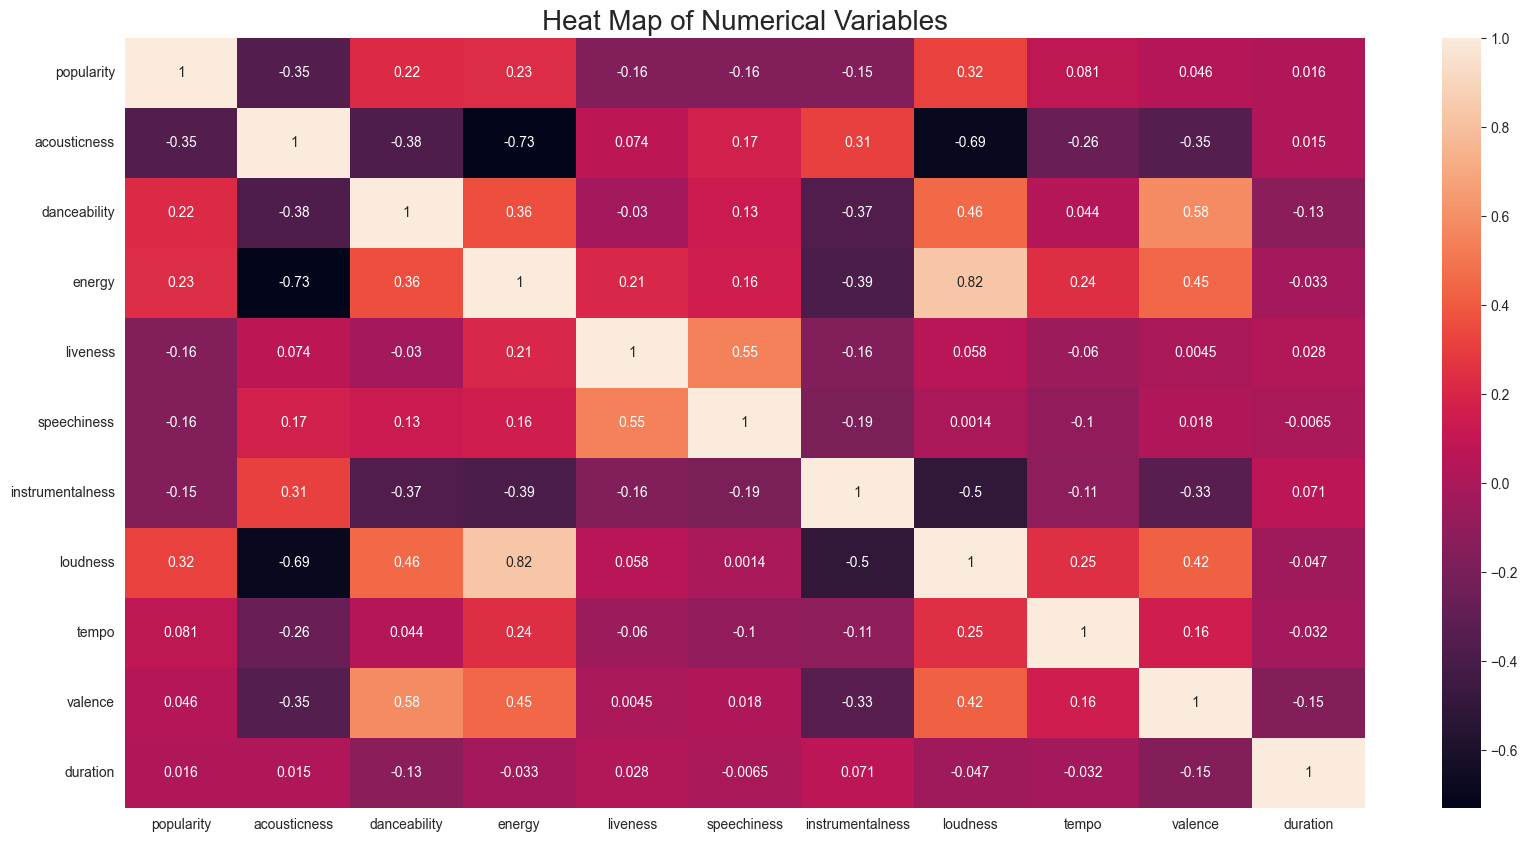

In [30]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_numerical.corr(),annot = True)
plt.title('Heat Map of Numerical Variables', size = 20);

From the heat map we can see that features "energy", "danceability", and "loudness" have high positive correlation with song popularity while "acousticness", "liveness", "speechiness", and "instrumentalness" have high negative correlation with song popularity. Correlation of "tempo", "valence", and "duration" with song popularity seems to be close to 0. We can display the distribution of each feature against popularity to verify these correlation values.

### Taking a closer look at "popularity" vs. "energy", "danceabiity", and "loudness"

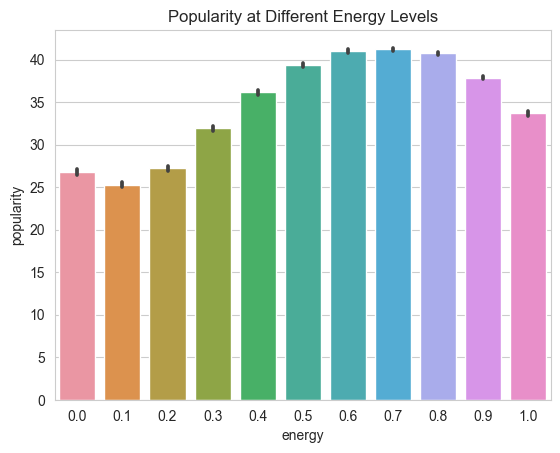

In [31]:
sns.barplot(x = df["energy"].round(1), y = df["popularity"])
plt.title('Popularity at Different Energy Levels');

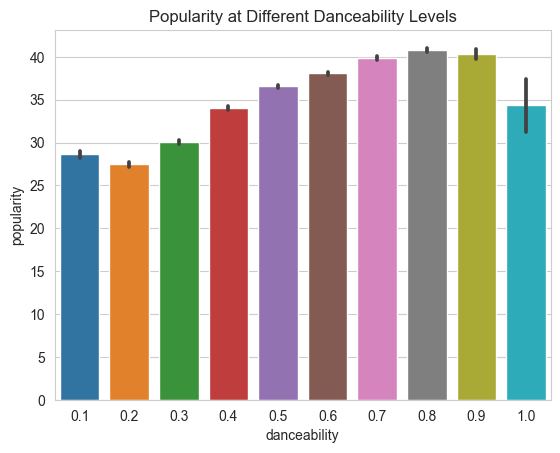

In [32]:
sns.barplot(x = df["danceability"].round(1), y = df["popularity"])
plt.title('Popularity at Different Danceability Levels');

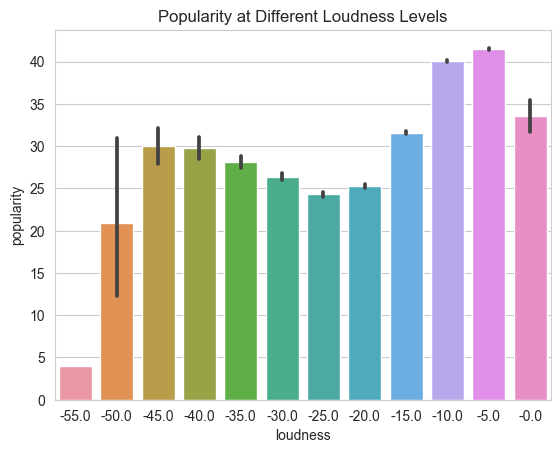

In [33]:
sns.barplot(x = df["loudness"].round() // 5 * 5, y = df["popularity"])
plt.title('Popularity at Different Loudness Levels');

The bar plot for energy and danceability look very similar, with roughly the same peak in popularity at around levels of 0.7/0.8. The plot for loudness has the same general shape except for the lowest loudness level of around -55, where the level of popularity tanks to around 5. Since there is no visible confidence interval, we assume that this song is most likely an outlier and most songs will most likely not hit that level of loudness.

In [34]:
df.sort_values("loudness").iloc[0, :2]

genre                      World
artist_name    Shakuhachi Sakano
Name: 218717, dtype: object

A quick Google search shows that the artist with the lowest loudness, Shakuhachi Sakano, releases deep meditative music for spas and sleep, which explains the loudness and the popularity.

### Take a closer look at "popularity" vs. "acousticness", "liveness", "speechiness", and "instrumentalness"

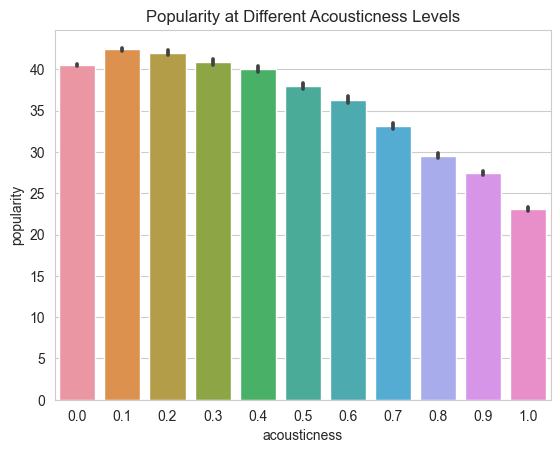

In [35]:
sns.barplot(x = df["acousticness"].round(1), y = df["popularity"])
plt.title('Popularity at Different Acousticness Levels');

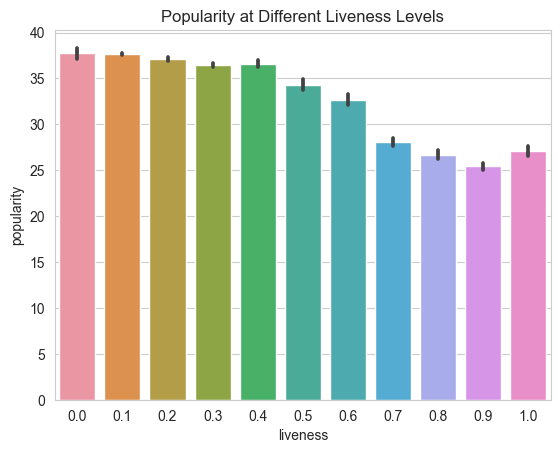

In [36]:
sns.barplot(x = df["liveness"].round(1), y = df["popularity"])
plt.title('Popularity at Different Liveness Levels');

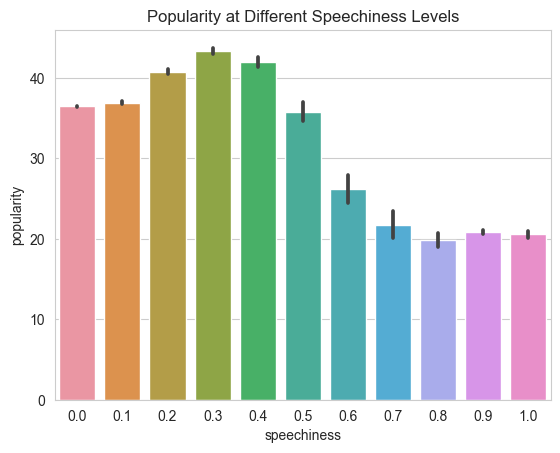

In [37]:
sns.barplot(x = df["speechiness"].round(1), y = df["popularity"])
plt.title('Popularity at Different Speechiness Levels');

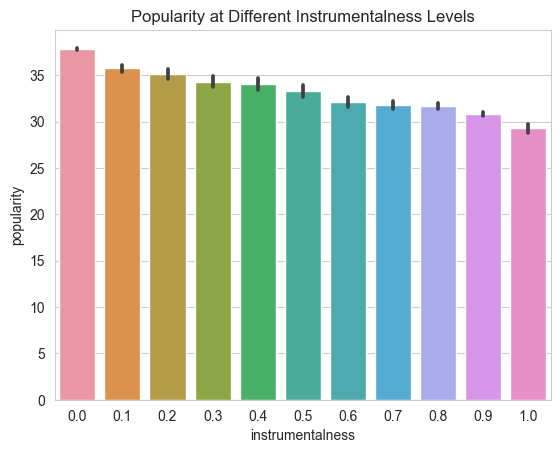

In [38]:
sns.barplot(x = df["instrumentalness"].round(1), y = df["popularity"])
plt.title('Popularity at Different Instrumentalness Levels');

We can see that for these variables, the higher the value, the lower the average popularity level, which corresponds to the correlation values we obtained from the heat map.

### Take a closer look at "popularity" vs. tempo", "valence", "duration"

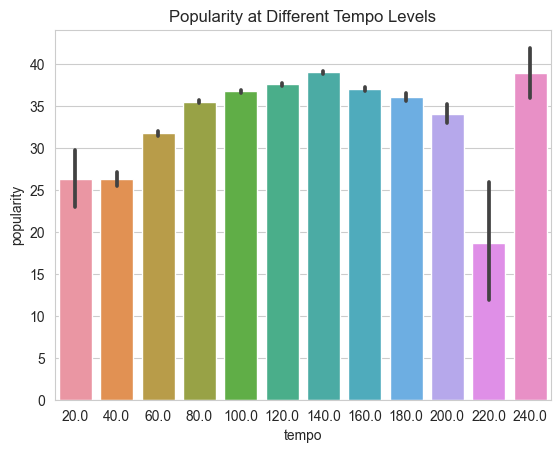

In [39]:
sns.barplot(x = df["tempo"].round() // 20 * 20, y = df["popularity"])
plt.title('Popularity at Different Tempo Levels');

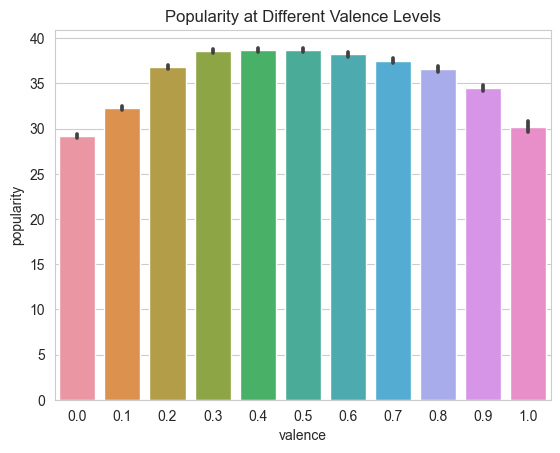

In [40]:
sns.barplot(x = df["valence"].round(1), y = df["popularity"])
plt.title('Popularity at Different Valence Levels');

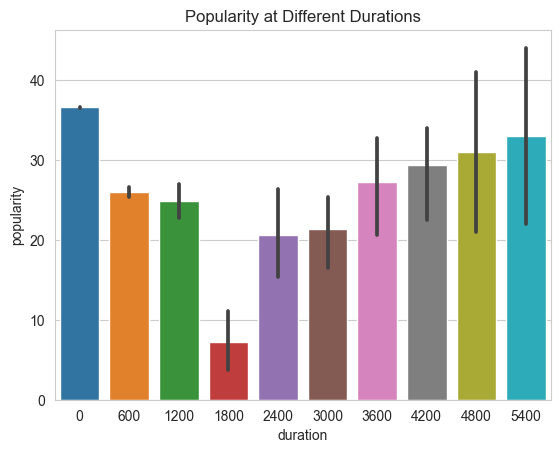

In [41]:
sns.barplot(x = df["duration"].round() // 600 * 600, y = df["popularity"])
plt.title('Popularity at Different Durations');

In [42]:
# take a look at songs with duration greater than 20 minutes
df[df['duration'] > 1200]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration,Mode_Minor,key_int,Genre_Alternative,Genre_Anime,Genre_Blues,Genre_Children's Music,Genre_Classical,Genre_Comedy,Genre_Country,Genre_Dance,Genre_Electronic,Genre_Folk,Genre_Hip-Hop,Genre_Indie,Genre_Jazz,Genre_Movie,Genre_Opera,Genre_Pop,Genre_R&B,Genre_Rap,Genre_Reggae,Genre_Reggaeton,Genre_Rock,Genre_Ska,Genre_Soul,Genre_Soundtrack,Genre_World,hit_song
15,Movie,Michel Roux,Les aventures d'Arsène Lupin: 813 - Partie 6,0uWUjxM7oDPKpb3T2y3oZm,0,0.5480,0.5880,2447870,0.4050,0.000,G#,0.7540,-15.550,Major,0.9380,83.560,0.75,0.4800,2448,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,mega-flop
96,Movie,Chorus,Koti Chennaya(Vol.1 &amp; 2),3NXlNZSmjO3DsJ3DQuyU8e,0,0.8400,0.6880,3435625,0.3310,0.000,F,0.0673,-8.645,Major,0.7720,102.244,1.00,0.5290,3436,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,mega-flop
114,Movie,Michel Roux,Les aventures d'Arsène Lupin: 813 - Partie 5,3kQkcxkRneREJohv69y6hD,0,0.5290,0.6430,2359123,0.4150,0.000,F,0.5360,-15.622,Minor,0.8830,101.296,0.75,0.4050,2359,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,mega-flop
342,Movie,Leopold Stokowski,Tristan und Isolde (Love Music from Acts II & ...,73ulytYi8ArzDYj4bjEHwN,0,0.9420,0.0883,1563347,0.1740,0.944,B,0.0949,-17.020,Major,0.0408,85.719,1.00,0.0299,1563,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,mega-flop
369,Movie,Michel Roux,L'aiguille creuse - Partie 1,06UFQjrvxqQe6EkHxcu9BX,0,0.8010,0.6980,2106095,0.3060,0.000,G#,0.8350,-15.032,Major,0.8570,132.123,0.75,0.5440,2106,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,mega-flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221561,World,Steve Roach,Structures From Silence,0MtjpVqsAEpHrsHENIsBZZ,22,0.9670,0.1420,1728293,0.0491,0.921,E,0.0775,-26.648,Minor,0.0369,70.075,1.00,0.0289,1728,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,mega-flop
221576,World,Steve Roach,Immanent,1LhLm2g43bQlPGG6ytD6y2,21,0.8590,0.1370,1677796,0.1270,0.943,D,0.0940,-30.110,Minor,0.0430,142.297,0.75,0.0388,1678,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,mega-flop
221608,World,Jon Hopkins,Late Night Tales: Jon Hopkins - Continuous Mix,2bz1ooPOnFb6jhGCk0ldQ4,30,0.6660,0.2350,4337529,0.4240,0.244,G,0.0902,-10.385,Major,0.0553,62.381,0.75,0.0972,4338,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,mega-flop
221700,World,DJ Drez,Come Together Mix,7mwkjjueiykT8FsG4APJTR,22,0.0419,0.7920,1203828,0.5090,0.421,C#,0.0972,-9.508,Minor,0.0625,94.014,1.00,0.1290,1204,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,mega-flop


We noticed that there are songs with duration of up to 90 minutes. We decided to remove all songs that are longer than 20 minutes from our dataset.

In [43]:
df = df[df['duration'] <= 1200]

In [44]:
len(df)

174153

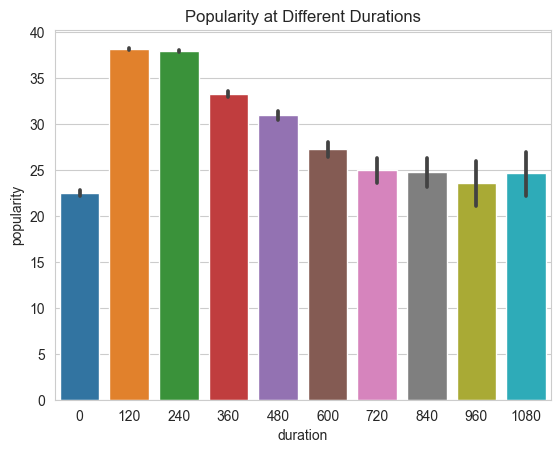

In [45]:
sns.barplot(x = df["duration"].round() // 120 * 120, y = df["popularity"])
plt.title('Popularity at Different Durations');

### Check multicollinearity using Variance Inflation Factor (VIF)

In [46]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif.sort_values('VIF', ascending = False)

calc_vif(df_numerical.drop(columns = ["popularity"]))

,variables,VIF
7,tempo,13.385083
2,energy,13.375549
1,danceability,12.149352
6,loudness,8.586263
8,valence,6.807698
0,acousticness,5.036582
9,duration,4.203136
3,liveness,3.299104
4,speechiness,2.276251
5,instrumentalness,1.904590


VIF values of 5 or higher indicates high multicollinearity. By removing features with low correlation running the VIF function again, we get

In [47]:
calc_vif(df_numerical.drop(columns = ["popularity", "tempo", "valence", "duration"]))

,variables,VIF
1,danceability,8.601223
2,energy,7.439983
6,loudness,7.086298
0,acousticness,4.858370
3,liveness,3.291353
4,speechiness,2.127440
5,instrumentalness,1.875624


Removing the feature with the highest VIF value

In [48]:
calc_vif(df_numerical.drop(columns = ["popularity", "tempo", "valence", "duration", "danceability"]))

,variables,VIF
5,loudness,6.272863
0,acousticness,4.768464
2,liveness,3.201631
1,energy,2.360125
3,speechiness,2.123851
4,instrumentalness,1.794432


Removing the feature with the highest VIF value again

In [49]:
calc_vif(df_numerical.drop(columns = ["popularity", "tempo", "valence", "duration", "danceability", "loudness"]))

,variables,VIF
2,liveness,3.187323
3,speechiness,2.115528
1,energy,2.114903
0,acousticness,2.055765
4,instrumentalness,1.478837


### Popularity vs. various categorial variables

In [50]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}% ({v:d})'.format(pct, v = val)
    return my_format

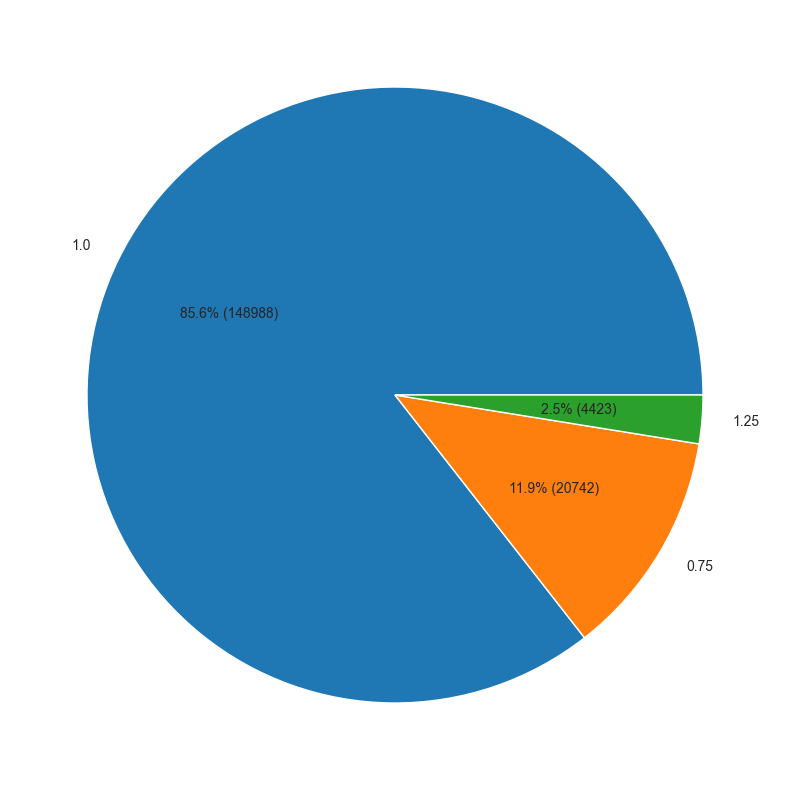

In [51]:
fig, ax = plt.subplots(figsize = (10, 10))
s = df['time_signature'].value_counts()
plt.pie(s, labels = s.index, autopct = autopct_format(s));

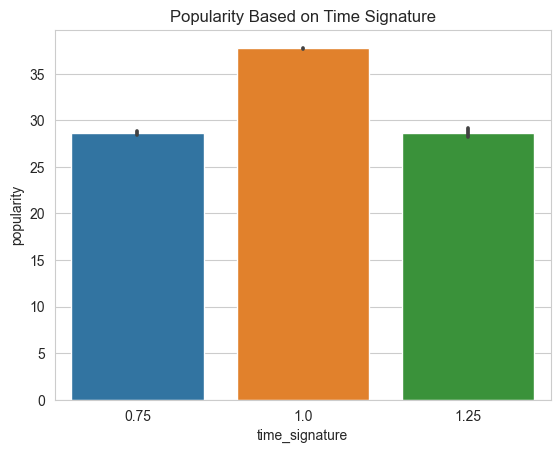

In [52]:
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature');

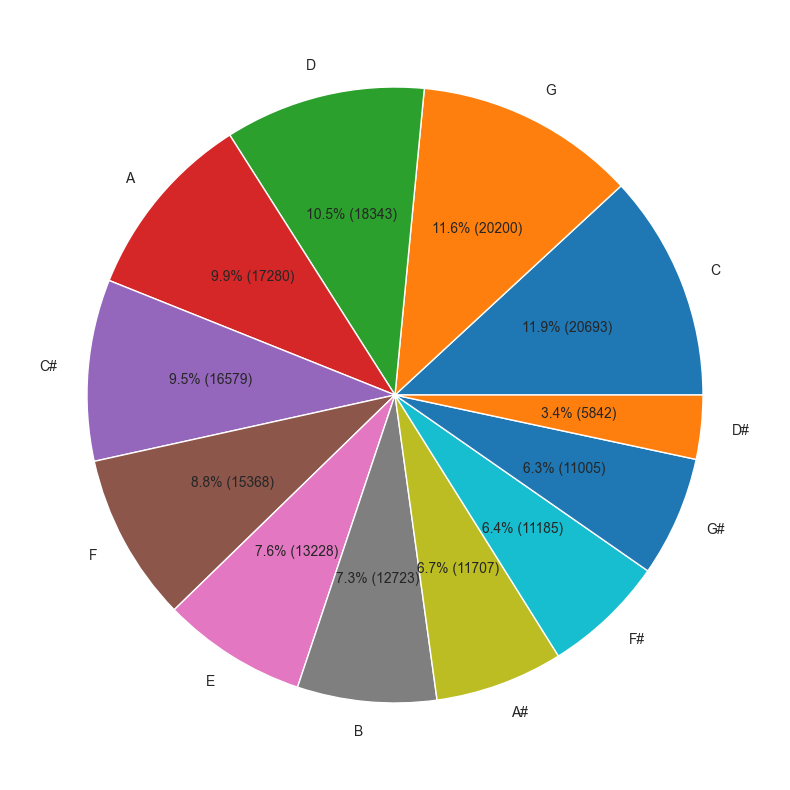

In [53]:
fig, ax = plt.subplots(figsize = (10, 10))
s = df['key'].value_counts()
plt.pie(s, labels = s.index, autopct = autopct_format(s));

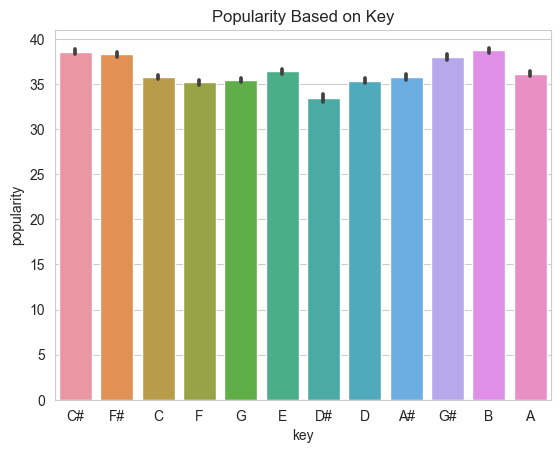

In [54]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key');

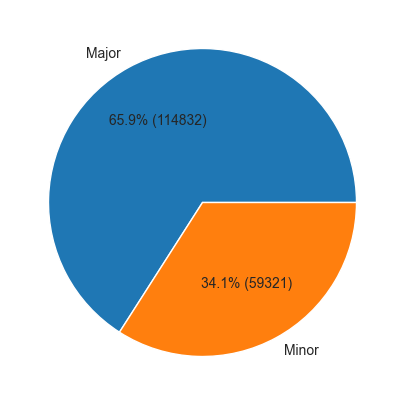

In [55]:
fig, ax = plt.subplots(figsize = (5, 5))
s = df['mode'].value_counts()
plt.pie(s, labels = s.index, autopct = autopct_format(s));

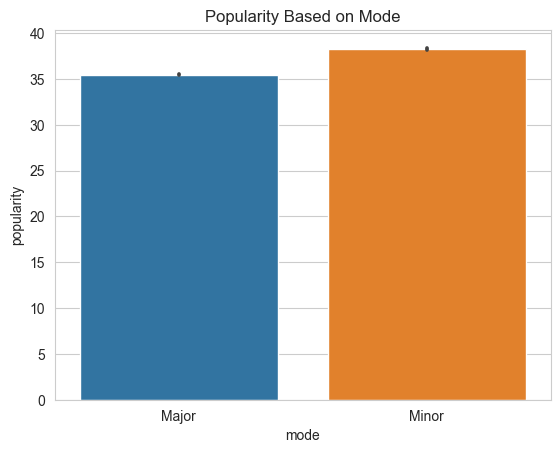

In [56]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode');

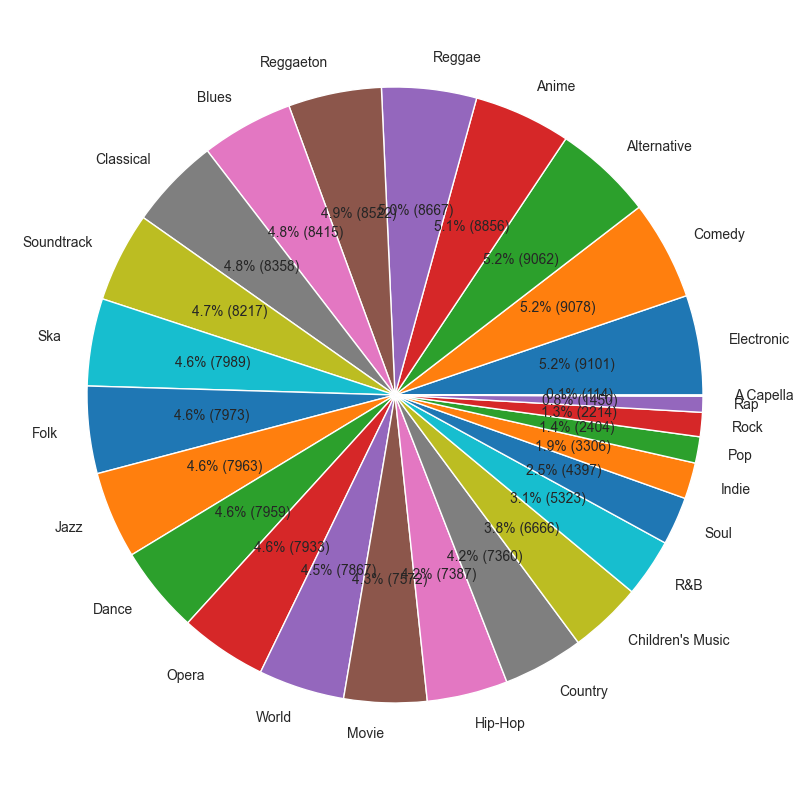

In [57]:
fig, ax = plt.subplots(figsize = (10, 10))
s = df['genre'].value_counts()
plt.pie(s, labels = s.index, autopct = autopct_format(s));

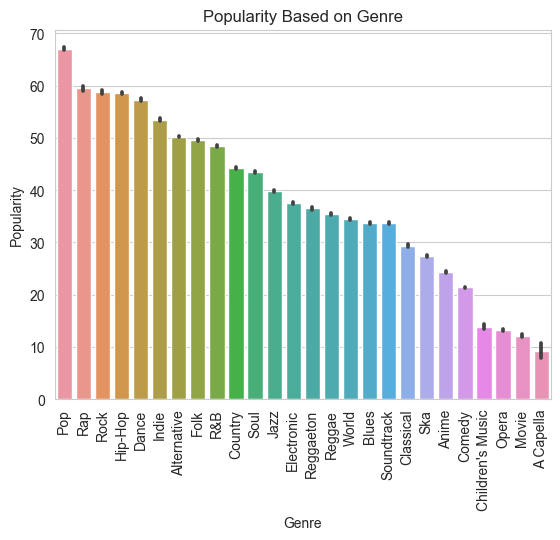

In [58]:
result = df.groupby(['genre'])['popularity'].aggregate(np.mean).reset_index().sort_values('popularity', ascending = False)
sns.barplot(x = 'genre', y = 'popularity', data = df, order = result['genre'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity Based on Genre');

## Baseline model

### Train-test-validation

In [59]:
X = df.drop(columns = ['popularity', 'genre', 'artist_name', 'track_name', 'track_id', 'duration_ms', 'key', 'mode', 'hit_song'])
y = df['hit_song']

Our dataset is too big and training takes too long. Though it would be ideal to have a larger training set, we are unable to test the models that we would like to due to the time constraint. We followed the advice from Chris and decided to train our models with a much smaller subset of our data (10%) and a test set size of 4.5%. Our train size is 17,415 and test size is 8,621.

In [60]:
# split the data into training and testing sets
X_train, X_test_large, y_train, y_test_large = train_test_split(X, y, train_size = 0.1, random_state = 42, stratify = y)

In [61]:
test = X_test_large
test['hit_song'] = y_test_large
sample_test = test.sample(frac = 0.055, random_state = 42)
X_test = sample_test.drop(columns = ['hit_song'])
y_test = sample_test['hit_song']

In [62]:
[len(X_train), len(X_test)]

[17415, 8621]

We then split our training data to obtain our validation set.

In [63]:
# split the data again to obtain validation set
X_train80, X_val, y_train80, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = 42)

### Logistic regression using all variables

We trained a basic logistic regression model an OVR training scheme and a default solver and penalty of 'lbfgs' and 'l2' respectively to obtain the scores below.

In [64]:
LR_Model = LogisticRegression(random_state = 42)
LR_Model.fit(X_train80, y_train80)
LR_Acc_Train = LR_Model.score(X_train80, y_train80)
LR_Acc_Val = LR_Model.score(X_val, y_val)

In [65]:
print(f"Train Accuracy: {LR_Acc_Train: .08f}.")
print(f"Validation Accuracy: {LR_Acc_Val: .08f}.")

Train Accuracy:  0.81373816.
Validation Accuracy:  0.81940856.


In [66]:
np.unique(LR_Model.predict(X_val))

array(['mega-flop', 'mega-hit'], dtype=object)

### Trying logistic regression with hyperparameters tuning and features selection

In [67]:
param_grid = [
    {'penalty': ['l2', 'none'], 
     'C': np.linspace(0.1, 1, 5)}
 ]
LR_Model_CV = LogisticRegression(solver = 'newton-cg', random_state = 42)
grid = GridSearchCV(estimator = LR_Model_CV, param_grid = param_grid)
grid_result = grid.fit(X_train80, y_train80)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.817039 using {'C': 0.1, 'penalty': 'none'}


In [68]:
LR_Model_Best = LogisticRegression(solver = 'newton-cg', penalty = 'none', C = 0.1, random_state = 42)
LR_Model_Best.fit(X_train80, y_train80)
LR_Best_Acc_Train = LR_Model_Best.score(X_train80, y_train80)
LR_Best_Acc_Val = LR_Model_Best.score(X_val, y_val)

In [69]:
print(f"Train Accuracy: {LR_Best_Acc_Train: .08f}.")
print(f"Validation Accuracy: {LR_Best_Acc_Val: .08f}.")

Train Accuracy:  0.81833190.
Validation Accuracy:  0.81940856.


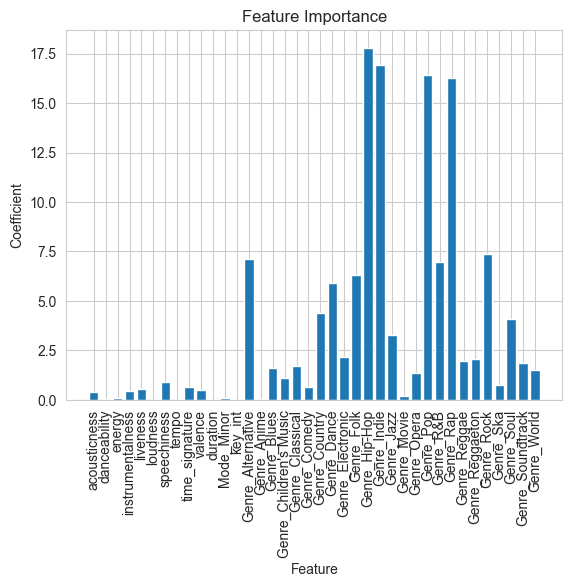

In [70]:
fig, ax = plt.subplots()
importance = abs(LR_Model_Best.coef_[0])
plt.xticks(rotation = 'vertical')
ax.bar([X_train80.columns[x] for x in range(len(importance))], importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Coefficient")
ax.set_title("Feature Importance");

Out of all the features, the features that are not the OHE Genre columns have the highest feature importance compared to the other values. We decided to train another model using only the OHE genre features.

In [71]:
LR_Model_Best_Features = LogisticRegression(solver = 'newton-cg', penalty = 'none', C = 0.1, random_state = 42)
LR_Model_Best_Features.fit(X_train.iloc[:,13:38], y_train)
LR_Best_Features_Acc_Train = LR_Model_Best_Features.score(X_train.iloc[:,13:38], y_train)
LR_Best_Features_Acc_Val = LR_Model_Best_Features.score(X_val.iloc[:,13:38], y_val)

In [72]:
print(f"Train Accuracy: {LR_Best_Features_Acc_Train: .08f}.")
print(f"Validation Accuracy: {LR_Best_Features_Acc_Val: .08f}.")

Train Accuracy:  0.81682458.
Validation Accuracy:  0.82055699.


In [73]:
np.unique(LR_Model_Best_Features.predict(X_val.iloc[:,13:38]))

array(['mega-flop', 'mega-hit'], dtype=object)

We see a slight increase in model performance.

## New Models

### Decision Tree

In [74]:
depths = np.arange(1, 30)
dt_train_accuracies = []
dt_val_accuracies = []
for depth in depths:
    DT_Model = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    DT_Model.fit(X_train80, y_train80)
    DT_Accuracy_train = DT_Model.score(X_train80, y_train80)
    DT_Accuracy_val = DT_Model.score(X_val, y_val)
    dt_train_accuracies.append(DT_Accuracy_train)
    dt_val_accuracies.append(DT_Accuracy_val)

In [75]:
DT_Best_Acc_Val = np.max(dt_val_accuracies)
DT_Best_Index = np.argmax(dt_val_accuracies)
best_depth = depths[DT_Best_Index]
DT_Best_Acc_Train = dt_train_accuracies[DT_Best_Index]

Best Depth: 14.
Train Accuracy: 0.877906976744186.
Validation Accuracy: 0.8079242032730405.


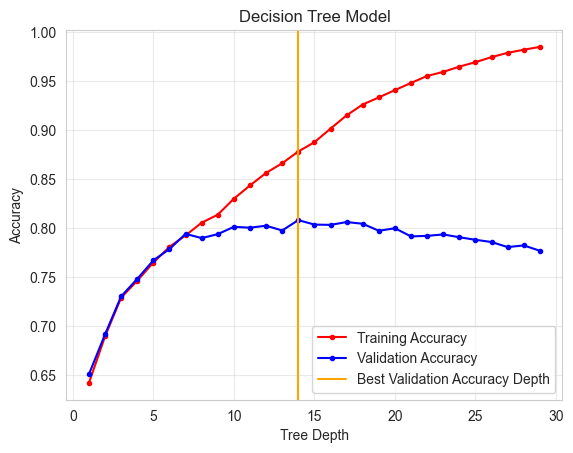

In [76]:
fig, ax = plt.subplots()
ax.plot(depths, dt_train_accuracies, marker = 'o', markersize = 3, label = 'Training Accuracy', color = 'red')
ax.plot(depths, dt_val_accuracies, marker = 'o', markersize = 3, label = 'Validation Accuracy', color = 'blue')
ax.axvline(x = best_depth, label = 'Best Validation Accuracy Depth', color = 'orange')
ax.set_xlabel('Tree Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Decision Tree Model')
plt.legend()
plt.grid(":", alpha = 0.4)
print(f"Best Depth: {best_depth}.")
print(f"Train Accuracy: {DT_Best_Acc_Train}.")
print(f"Validation Accuracy: {DT_Best_Acc_Val}.")

In [77]:
# defining this model for our test data later
DT_Model_Best = DecisionTreeClassifier(max_depth = best_depth, random_state = 42)
DT_Model_Best.fit(X_train80, y_train80)

DecisionTreeClassifier(max_depth=14, random_state=42)

### Bagging with decision tree of depth 14 as base model

In [78]:
basemodel =  DecisionTreeClassifier(max_depth = best_depth, random_state = 42)

# Initialize a Bagging classifier with the Decision Tree as the base
Bagging_Model = BaggingClassifier(base_estimator = basemodel, n_estimators = 100, random_state = 42)

# Fit the Bagging model on the training set
Bagging_Model.fit(X_train80, y_train80)
BM_Best_Acc_Train = Bagging_Model.score(X_train80, y_train80)
BM_Best_Acc_Val = Bagging_Model.score(X_val, y_val)

In [79]:
print(f"Train Accuracy: {BM_Best_Acc_Train: .08f}.")
print(f"Validation Accuracy: {BM_Best_Acc_Val: .08f}.")

Train Accuracy:  0.91279070.
Validation Accuracy:  0.82170543.


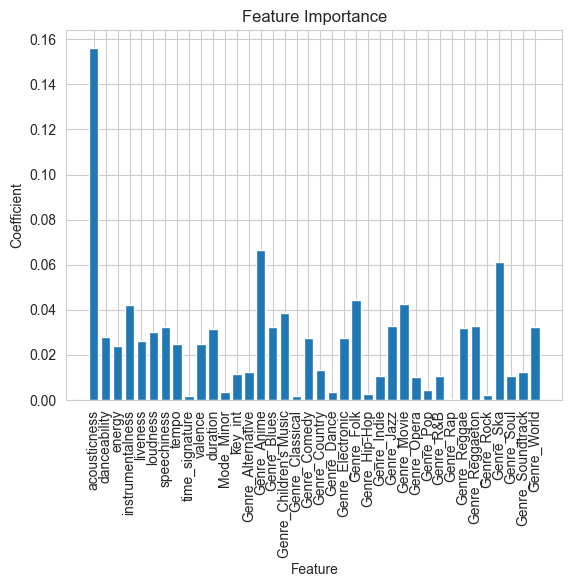

In [80]:
fig, ax = plt.subplots()
importance = np.mean([tree.feature_importances_ for tree in Bagging_Model.estimators_], axis=0)
plt.xticks(rotation = 'vertical')
ax.bar([X_train80.columns[x] for x in range(len(importance))], importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Coefficient")
ax.set_title("Feature Importance");

We were unable to improve the Bagging model's performance any further.

### KNN Model

In [81]:
n_neighbors = np.arange(1, 2000, 50)
knn_train_accuracies = []
knn_val_accuracies = []
for n in n_neighbors:
    KNN_Model = KNeighborsClassifier(n_neighbors = n)
    KNN_Model.fit(X_train80, y_train80)
    KNN_Accuracy_train = KNN_Model.score(X_train80, y_train80)
    KNN_Accuracy_val = KNN_Model.score(X_val, y_val)
    knn_train_accuracies.append(KNN_Accuracy_train)
    knn_val_accuracies.append(KNN_Accuracy_val)
KNN_Best_Acc_Val = np.max(knn_val_accuracies)
knn_best_index = np.argmax(knn_val_accuracies)
best_k = n_neighbors[knn_best_index]
KNN_Best_Acc_Train = knn_train_accuracies[knn_best_index]

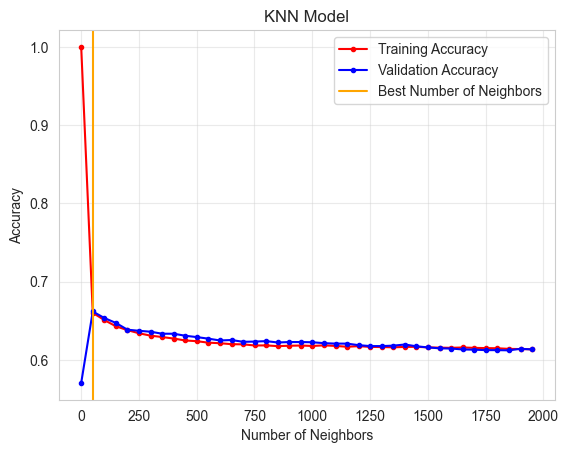

In [82]:
fig, ax = plt.subplots()
ax.plot(n_neighbors, knn_train_accuracies, marker = 'o', markersize = 3, label = 'Training Accuracy', color = 'red')
ax.plot(n_neighbors, knn_val_accuracies, marker = 'o', markersize = 3, label = 'Validation Accuracy', color = 'blue')
ax.axvline(x = best_k, label = 'Best Number of Neighbors', color = 'orange')
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Model')
plt.legend()
plt.grid(":", alpha = 0.4);

In [83]:
KNN_Model_Best = KNeighborsClassifier(n_neighbors = best_k)
KNN_Model_Best.fit(X_train80, y_train80)
KNN_Best_Acc_Train = KNN_Model_Best.score(X_train80, y_train80)
KNN_Best_Acc_Val = KNN_Model_Best.score(X_val, y_val)

In [84]:
print(f"Best k: {best_k}.")
print(f"Train Accuracy: {KNN_Best_Acc_Train: .08f}.")
print(f"Validation Accuracy: {KNN_Best_Acc_Val: .08f}.")

Best k: 51.
Train Accuracy:  0.66006316.
Validation Accuracy:  0.66178582.


### Random Forest

In [85]:
random_grid = {'n_estimators': np.arange(500, 1000, 100),
               'max_features': ['sqrt', 'log2'],
               'max_depth': np.arange(15, 23),
               'min_samples_split': [3, 5, 7],
               'min_samples_leaf': [3, 5, 7]}

RFC_Model = RandomForestClassifier(random_state = 42)
grid_rcf = RandomizedSearchCV(estimator = RFC_Model, param_distributions = random_grid, n_jobs = -1, cv = 2, random_state = 42)
result = grid_rcf.fit(X_train80, y_train80)
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.817901 using {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 19}


In [86]:
RFC_Model = RandomForestClassifier(max_depth = 19, n_estimators = 500, criterion = 'log_loss', min_samples_split = 3, min_samples_leaf = 7, max_features = 'sqrt', random_state = 42)
RFC_Model.fit(X_train80, y_train80)
RFC_Acc_Train = RFC_Model.score(X_train80, y_train80)
RFC_Acc_Val = RFC_Model.score(X_val, y_val)

In [87]:
print(f"Train Accuracy: {RFC_Acc_Train: .08f}.")
print(f"Validation Accuracy: {RFC_Acc_Val: .08f}.")

Train Accuracy:  0.85981912.
Validation Accuracy:  0.82716049.


In [88]:
np.unique(RFC_Model.predict(X_val))

array(['mega-flop', 'mega-hit'], dtype=object)

### Neural Network

In [89]:
y_train80_encoded = []
for x in y_train80:
    if x == "mega-flop":
        y_train80_encoded.append(0)
    elif x == "mega-hit":
        y_train80_encoded.append(1)
y_train80_encoded = np.array(y_train80_encoded)

y_val_encoded = []
for x in y_val:
    if x == "mega-flop":
        y_val_encoded.append(0)
    elif x == "mega-hit":
        y_val_encoded.append(1)
y_val_encoded = np.array(y_val_encoded)

In [90]:
tf.random.set_seed(42)
NN_Model = tf.keras.models.Sequential()
NN_Model.add(tf.keras.layers.Dense(38, activation='relu', input_shape=(38,)))
NN_Model.add(tf.keras.layers.Dense(20, activation='relu'))
NN_Model.add(tf.keras.layers.Dense(100,activation='relu'))
NN_Model.add(tf.keras.layers.Dense(20,activation='relu'))
NN_Model.add(keras.layers.Dropout(0.2))
NN_Model.add(tf.keras.layers.Dense(2, activation='softmax'))
NN_Model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
NN_Model.fit(X_train80, y_train80_encoded, validation_split = 0.2, epochs = 20)

2022-12-11 17:01:37.805887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
349/349 [==============================] - 5s 5ms/step - loss: 0.7043 - accuracy: 0.6084 - val_loss: 0.6268 - val_accuracy: 0.6602
Epoch 2/20
349/349 [==============================] - 1s 3ms/step - loss: 0.6255 - accuracy: 0.6640 - val_loss: 0.6042 - val_accuracy: 0.6756
Epoch 3/20
349/349 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7438 - val_loss: 0.4159 - val_accuracy: 0.8088
Epoch 4/20
349/349 [==============================] - 1s 1ms/step - loss: 0.4337 - accuracy: 0.8010 - val_loss: 0.4053 - val_accuracy: 0.8059
Epoch 5/20
349/349 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.8069 - val_loss: 0.3905 - val_accuracy: 0.8123
Epoch 6/20
349/349 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8061 - val_loss: 0.3824 - val_accuracy: 0.8088
Epoch 7/20
349/349 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8031 - val_loss: 0.3856 - val_accuracy: 0.8030
Epoch 

In [91]:
NN_Acc_Train = NN_Model.evaluate(X_train80, y_train80_encoded)[1]

436/436 [==============================] - 1s 1ms/step - loss: 0.3712 - accuracy: 0.8183


In [92]:
NN_Acc_Val = NN_Model.evaluate(X_val, y_val_encoded)[1]

109/109 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8237


In [93]:
print(f"Train Accuracy: {NN_Acc_Train: .08f}."
     )
print(f"Validation Accuracy: {NN_Acc_Val: .08f}.")

Train Accuracy:  0.81833190.
Validation Accuracy:  0.82371521.


We have now tested all the models that we would like to given the time constraint. We will now score the models with the test data.

In [94]:
# encode y_test for NN_Model
y_test_encoded = []
for x in y_test:
    if x == "mega-flop":
        y_test_encoded.append(0)
    elif x == "mega-hit":
        y_test_encoded.append(1)
y_test_encoded = np.array(y_test_encoded)

In [95]:
# list to contain all of our models except for the NN_Model and LR_Model_Best_Features
models = [LR_Model, LR_Model_Best, DT_Model_Best, Bagging_Model, KNN_Model_Best, RFC_Model]
test_accuracies = []
for model in models:
    test_accuracies.append(model.score(X_test, y_test))
test_accuracies.insert(2, LR_Model_Best_Features.score(X_test.iloc[:,13:38], y_test))
test_accuracies.append(NN_Model.evaluate(X_test, y_test_encoded)[1])
test_accuracies

270/270 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.8130


[0.8119707690523141,
 0.8139426980628698,
 0.8128987356455167,
 0.790163554112052,
 0.8130147314696671,
 0.632989212388354,
 0.8089548776244055,
 0.8130147457122803]

In [96]:
models_df = pd.DataFrame({'Model': ['Logistic Regression', 
                                   'Logistic Regression Best Parameters', 
                                   'Logistic Regression Best Parameters + Feature Selection',
                                   'Decision Tree Best Depth',
                                   'Bagging Best Depth',
                                   'K-Nearest Neighbors Best K',
                                   'Random Forest',
                                   'Neural Network'],
                          'Train Accuracy': [LR_Acc_Train,
                                             LR_Best_Acc_Train,
                                             LR_Best_Features_Acc_Train,
                                             DT_Best_Acc_Train,
                                             BM_Best_Acc_Train,
                                             KNN_Best_Acc_Train,
                                             RFC_Acc_Train,
                                             NN_Acc_Train],
                          'Validation Accuracy': [LR_Acc_Val,
                                             LR_Best_Acc_Val,
                                             LR_Best_Features_Acc_Val,
                                             DT_Best_Acc_Val,
                                             BM_Best_Acc_Val,
                                             KNN_Best_Acc_Val,
                                             RFC_Acc_Val,
                                             NN_Acc_Val],
                          'Test Accuracy': test_accuracies
                         })

In [97]:
models_df.sort_values('Validation Accuracy', ascending = False)

,Model,Train Accuracy,Validation Accuracy,Test Accuracy
6,Random Forest,0.859819,0.827160,0.808955
7,Neural Network,0.818332,0.823715,0.813015
4,Bagging Best Depth,0.912791,0.821705,0.813015
2,Logistic Regression Best Parameters + Feature ...,0.816825,0.820557,0.812899
0,Logistic Regression,0.813738,0.819409,0.811971
1,Logistic Regression Best Parameters,0.818332,0.819409,0.813943
3,Decision Tree Best Depth,0.877907,0.807924,0.790164
5,K-Nearest Neighbors Best K,0.660063,0.661786,0.632989


## Multi-class Models

Our initial idea was to perform a binary classification where we predict whether a song is a "hit" or a "flop". However, we were also interested to see how well a multi-class classification could work on our dataset. We were excited to explore this new classification model as it allows us to predict a more specific range of popularity for each song. Hence, our target variable  “hit_song” is now divided into 5 classes, namely "mega-flop", "flop", "average", "hit", and "mega-hit", with the cut-offs at every 20% of the data to ensure that all classes are weighted equally.

In [98]:
# list for song categories
category = []
for score in df['popularity']:
    if score >= 51:
        category.append("mega-hit")
    elif score >= 42:
        category.append("hit")
    elif score >= 33: 
        category.append("average")
    elif score >= 22:
        category.append("flop")
    else:
        category.append("mega-flop")
# append new column to the dataframe
df['hit_song'] = category
df['hit_song'].unique()

array(['mega-flop', 'mega-hit', 'flop', 'hit', 'average'], dtype=object)

The table below shows the percentage of songs in each category.

In [99]:
pd.DataFrame(df['hit_song'].value_counts(normalize=True) * 100)

,hit_song
mega-hit,21.326075
flop,20.520462
average,19.811890
mega-flop,19.175667
hit,19.165906


### Train-test split for multi-class

In [100]:
X = df.drop(columns = ['popularity', 'genre', 'artist_name', 'track_name', 'track_id', 'duration_ms', 'key', 'mode', 'hit_song'])
y = df['hit_song']

In [101]:
# split the data into training and testing sets
X_train, X_test_large, y_train, y_test_large = train_test_split(X, y, train_size = 0.1, random_state = 42, stratify = y)
test = X_test_large
test['hit_song'] = y_test_large
sample_test = test.sample(frac = 0.055, random_state = 42)
X_test = sample_test.drop(columns = ['hit_song'])
y_test = sample_test['hit_song']
[len(X_train), len(X_test)]

[17415, 8621]

In [102]:
# split the data again to obtain validation set
X_train80, X_val, y_train80, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = 42)

### Multi-class logistic regression with hyperparameters tuning & features selection

We trained a basic logistic regression model an OVR training scheme and a default solver and penalty of 'lbfgs' and 'l2' respectively to obtain the scores below.

In [103]:
LR_Model = LogisticRegression(multi_class = 'ovr')
LR_Model.fit(X_train80, y_train80)
LR_Acc_Train = LR_Model.score(X_train80, y_train80)
LR_Acc_Val = LR_Model.score(X_val, y_val)

In [104]:
print(f"Train Accuracy: {LR_Acc_Train: .08f}.")
print(f"Validation Accuracy: {LR_Acc_Val: .08f}.")

Train Accuracy:  0.53028998.
Validation Accuracy:  0.53402239.


In [105]:
np.unique(LR_Model.predict(X_val))

array(['average', 'flop', 'hit', 'mega-flop', 'mega-hit'], dtype=object)

We will use GridSearchCV from sklearn to perform hyperparameter tuning for our multiclass logistic regression model. From tuning the hyperparameters iteratively, we found that using newton-cg as our solver provides the best performance. Therefore the other hyperparameters that we are looking to tune are penalty (L2 or no penalty) and inverse regularization strength C. Our model will be using OVR for its training scheme.

In [106]:
param_grid = [
    {'penalty': ['l2', 'none'], 
     'C': np.linspace(0.1, 1, 5)}
 ]
LR_Model_CV = LogisticRegression(multi_class = 'ovr', solver = 'newton-cg', random_state = 42)
grid = GridSearchCV(estimator = LR_Model_CV, param_grid = param_grid)
grid_result = grid.fit(X_train80, y_train80)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.524835 using {'C': 0.1, 'penalty': 'none'}


Using the parameters we obtained above (penalty = none and C = 0.1) to train another logistic regression model.

In [107]:
LR_Model_Best = LogisticRegression(multi_class = 'ovr', solver = 'newton-cg', penalty = 'none', C = 0.1, random_state = 42)
LR_Model_Best.fit(X_train80, y_train80)
LR_Best_Acc_Train = LR_Model_Best.score(X_train80, y_train80)
LR_Best_Acc_Val = LR_Model_Best.score(X_val, y_val)

In [108]:
print(f"Train Accuracy: {LR_Best_Acc_Train: .08f}.")
print(f"Validation Accuracy: {LR_Best_Acc_Val: .08f}.")

Train Accuracy:  0.53265863.
Validation Accuracy:  0.54378409.


In [109]:
np.unique(LR_Model_Best.predict(X_val))

array(['average', 'flop', 'hit', 'mega-flop', 'mega-hit'], dtype=object)

We obtained a model with a slight improvement in both training accuracy and validation accuracy.

We can also plot a bar plot of feature importance for our logistic regression model.

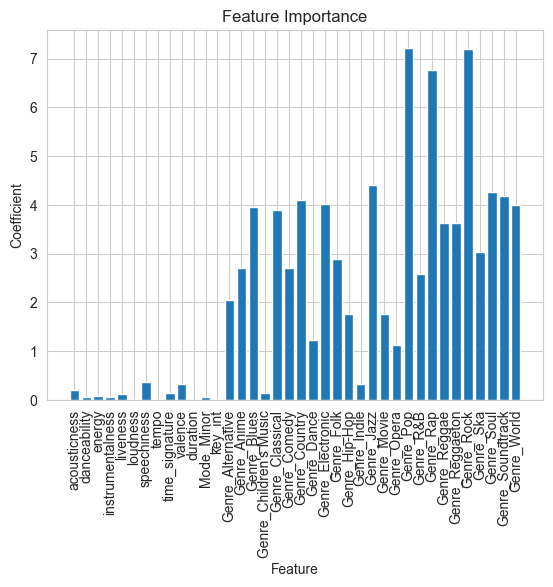

In [110]:
fig, ax = plt.subplots()
importance = abs(LR_Model_Best.coef_[0])
plt.xticks(rotation = 'vertical')
ax.bar([X_train80.columns[x] for x in range(len(importance))], importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Coefficient")
ax.set_title("Feature Importance");

Similar to what we observed for our binary classification, the features that are OHE genre greatly surpass in importance as compared to the other features. We imitated the same process we did earlier with the binary classification by creating a logistic regression model with only the OHE genre features.

In [111]:
LR_Model_Best_Features = LogisticRegression(multi_class = 'ovr', solver = 'newton-cg', penalty = 'none', C = 0.1, random_state = 42)
LR_Model_Best_Features.fit(X_train.iloc[:,13:38], y_train)
LR_Best_Features_Acc_Train = LR_Model_Best_Features.score(X_train.iloc[:,13:38], y_train)
LR_Best_Features_Acc_Val = LR_Model_Best_Features.score(X_val.iloc[:,13:38], y_val)

In [112]:
print(f"Train Accuracy: {LR_Best_Features_Acc_Train: .08f}.")
print(f"Validation Accuracy: {LR_Best_Features_Acc_Val: .08f}.")

Train Accuracy:  0.53224232.
Validation Accuracy:  0.53890324.


In [113]:
np.unique(LR_Model_Best_Features.predict(X_val.iloc[:,13:38]))

array(['average', 'flop', 'hit', 'mega-flop', 'mega-hit'], dtype=object)

Our model did not improve this time, however. We decided to move on to the other models since we saw promising results with the binary classification with those as well.

### Decision tree with bagging

In [114]:
depths = np.arange(1, 30)
dt_train_accuracies = []
dt_val_accuracies = []
for depth in depths:
    DT_Model = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    DT_Model.fit(X_train80, y_train80)
    DT_Accuracy_train = DT_Model.score(X_train80, y_train80)
    DT_Accuracy_val = DT_Model.score(X_val, y_val)
    dt_train_accuracies.append(DT_Accuracy_train)
    dt_val_accuracies.append(DT_Accuracy_val)

In [115]:
DT_Best_Acc_Val = np.max(dt_val_accuracies)
DT_Best_Index = np.argmax(dt_val_accuracies)
best_depth = depths[DT_Best_Index]
DT_Best_Acc_Train = dt_train_accuracies[DT_Best_Index]

Best Depth: 19.
Train Accuracy: 0.6772179155900087.
Validation Accuracy: 0.491817398794143.


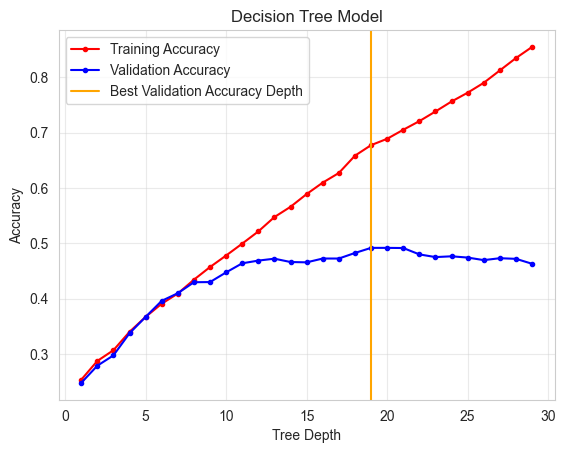

In [116]:
fig, ax = plt.subplots()
ax.plot(depths, dt_train_accuracies, marker = 'o', markersize = 3, label = 'Training Accuracy', color = 'red')
ax.plot(depths, dt_val_accuracies, marker = 'o', markersize = 3, label = 'Validation Accuracy', color = 'blue')
ax.axvline(x = best_depth, label = 'Best Validation Accuracy Depth', color = 'orange')
ax.set_xlabel('Tree Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Decision Tree Model')
plt.legend()
plt.grid(":", alpha = 0.4)
print(f"Best Depth: {best_depth}.")
print(f"Train Accuracy: {DT_Best_Acc_Train}.")
print(f"Validation Accuracy: {DT_Best_Acc_Val}.")

In [117]:
# defining this model for our test data later
DT_Model_Best = DecisionTreeClassifier(max_depth = best_depth, random_state = 42)
DT_Model_Best.fit(X_train80, y_train80)

DecisionTreeClassifier(max_depth=19, random_state=42)

We used depth = 19 as our base model for the bagging.

In [118]:
basemodel =  DecisionTreeClassifier(max_depth = best_depth, random_state = 42)

# Initialize a Bagging classifier with the Decision Tree as the base
Bagging_Model = BaggingClassifier(base_estimator = basemodel, n_estimators = 100)

# Fit the Bagging model on the training set
Bagging_Model.fit(X_train80, y_train80)
BM_Best_Acc_Train = Bagging_Model.score(X_train80, y_train80)
BM_Best_Acc_Val = Bagging_Model.score(X_val, y_val)

In [119]:
print(f"Train Accuracy: {BM_Best_Acc_Train: .08f}.")
print(f"Validation Accuracy: {BM_Best_Acc_Val: .08f}.")

Train Accuracy:  0.73614700.
Validation Accuracy:  0.53775481.


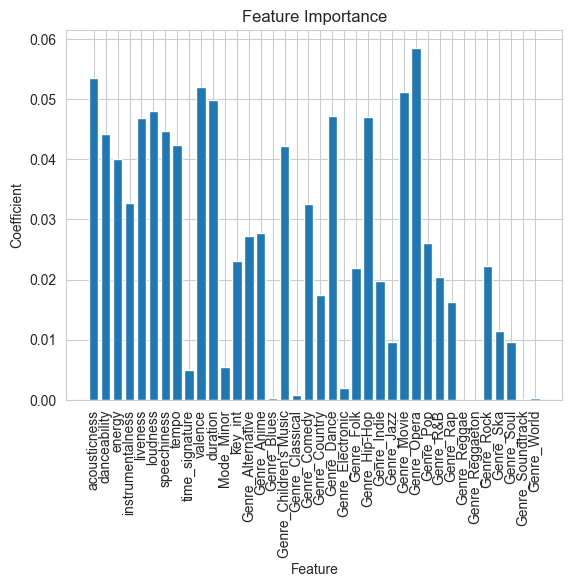

In [120]:
fig, ax = plt.subplots()
importance = np.mean([tree.feature_importances_ for tree in Bagging_Model.estimators_], axis=0)
plt.xticks(rotation = 'vertical')
ax.bar([X_train80.columns[x] for x in range(len(importance))], importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Coefficient")
ax.set_title("Feature Importance");

We were unable to improve the Bagging model's performance any further with features selection.

### KNN model

In [121]:
n_neighbors = np.arange(1, 2000, 50)
knn_train_accuracies = []
knn_val_accuracies = []
for n in n_neighbors:
    KNN_Model = KNeighborsClassifier(n_neighbors = n)
    KNN_Model.fit(X_train80, y_train80)
    KNN_Accuracy_train = KNN_Model.score(X_train80, y_train80)
    KNN_Accuracy_val = KNN_Model.score(X_val, y_val)
    knn_train_accuracies.append(KNN_Accuracy_train)
    knn_val_accuracies.append(KNN_Accuracy_val)
knn_best_val_acc = np.max(knn_val_accuracies)
knn_best_index = np.argmax(knn_val_accuracies)
best_k = n_neighbors[knn_best_index]
knn_best_train_acc = knn_train_accuracies[knn_best_index]

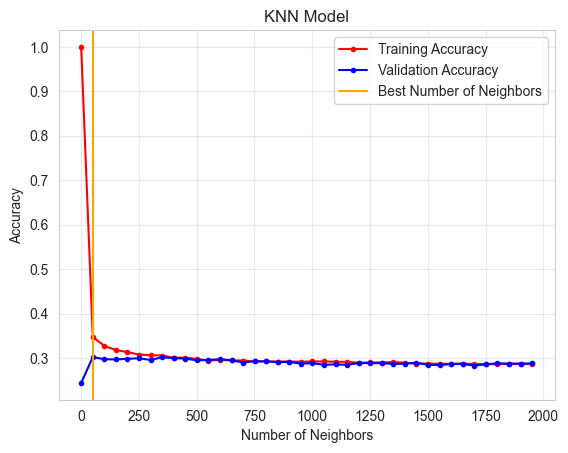

In [122]:
fig, ax = plt.subplots()
ax.plot(n_neighbors, knn_train_accuracies, marker = 'o', markersize = 3, label = 'Training Accuracy', color = 'red')
ax.plot(n_neighbors, knn_val_accuracies, marker = 'o', markersize = 3, label = 'Validation Accuracy', color = 'blue')
ax.axvline(x = best_k, label = 'Best Number of Neighbors', color = 'orange')
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Model')
plt.legend()
plt.grid(":", alpha = 0.4);

In [123]:
KNN_Model_Best = KNeighborsClassifier(n_neighbors = best_k)
KNN_Model_Best.fit(X_train80, y_train80)
KNN_Best_Acc_Train = KNN_Model_Best.score(X_train80, y_train80)
KNN_Best_Acc_Val = KNN_Model_Best.score(X_val, y_val)

In [124]:
print(f"Best k: {best_k}.")
print(f"Train Accuracy: {KNN_Best_Acc_Train: .08f}.")
print(f"Validation Accuracy: {KNN_Best_Acc_Val: .08f}.")

Best k: 51.
Train Accuracy:  0.34776055.
Validation Accuracy:  0.30203847.


### Random forest

In [125]:
random_grid = {'n_estimators': np.arange(500, 1000, 100),
               'max_features': ['sqrt', 'log2'],
               'max_depth': np.arange(15, 23),
               'min_samples_split': [3, 5, 7],
               'min_samples_leaf': [3, 5, 7]}

RFC_Model = RandomForestClassifier(random_state = 42)
grid_rcf = RandomizedSearchCV(estimator = RFC_Model, param_distributions = random_grid, n_jobs = -1, cv = 2, random_state = 42)
result = grid_rcf.fit(X_train80, y_train80)
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.532228 using {'n_estimators': 500, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 18}


In [126]:
RFC_Model = RandomForestClassifier(max_depth = 18, n_estimators = 500, criterion = 'log_loss', min_samples_split = 7, min_samples_leaf = 5, max_features = 'log2', random_state = 42)
RFC_Model.fit(X_train80, y_train80)
RFC_Acc_Train = RFC_Model.score(X_train80, y_train80)
RFC_Acc_Val = RFC_Model.score(X_val, y_val)

In [127]:
print(f"Train Accuracy: {RFC_Acc_Train: .08f}.")
print(f"Validation Accuracy: {RFC_Acc_Val: .08f}.")

Train Accuracy:  0.73148148.
Validation Accuracy:  0.53603216.


In [128]:
np.unique(RFC_Model.predict(X_val))

array(['average', 'flop', 'hit', 'mega-flop', 'mega-hit'], dtype=object)

### Neural network

In [129]:
y_train80_encoded = []
for x in y_train80:
    if x == "mega-hit":
        y_train80_encoded.append(0)
    elif x == "hit":
        y_train80_encoded.append(1)
    elif x == "average": 
        y_train80_encoded.append(2)
    elif x == "flop":
        y_train80_encoded.append(3)
    else:
        y_train80_encoded.append(4)
y_train80_encoded = np.array(y_train80_encoded)

y_val_encoded = []
for x in y_val:
    if x == "mega-hit":
        y_val_encoded.append(0)
    elif x == "hit":
        y_val_encoded.append(1)
    elif x == "average": 
        y_val_encoded.append(2)
    elif x == "flop":
        y_val_encoded.append(3)
    else:
        y_val_encoded.append(4)
y_val_encoded = np.array(y_val_encoded)

In [130]:
tf.random.set_seed(42)
NN_Model = tf.keras.models.Sequential()
NN_Model.add(tf.keras.layers.Dense(38, activation='relu', input_shape=(38,)))
NN_Model.add(tf.keras.layers.Dense(20, activation='relu'))
NN_Model.add(tf.keras.layers.Dense(100,activation='relu'))
NN_Model.add(tf.keras.layers.Dense(20,activation='relu'))
NN_Model.add(keras.layers.Dropout(0.2))
NN_Model.add(tf.keras.layers.Dense(5, activation='softmax'))
NN_Model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
NN_Model.fit(X_train80, y_train80_encoded, validation_split = 0.2, epochs = 20)

Epoch 1/20
349/349 [==============================] - 3s 2ms/step - loss: 1.9264 - accuracy: 0.2403 - val_loss: 1.5690 - val_accuracy: 0.2770
Epoch 2/20
349/349 [==============================] - 1s 2ms/step - loss: 1.5877 - accuracy: 0.2405 - val_loss: 1.5578 - val_accuracy: 0.2967
Epoch 3/20
349/349 [==============================] - 1s 2ms/step - loss: 1.5717 - accuracy: 0.2653 - val_loss: 1.5248 - val_accuracy: 0.3193
Epoch 4/20
349/349 [==============================] - 1s 2ms/step - loss: 1.5221 - accuracy: 0.3098 - val_loss: 1.4534 - val_accuracy: 0.3613
Epoch 5/20
349/349 [==============================] - 1s 2ms/step - loss: 1.4127 - accuracy: 0.3552 - val_loss: 1.3930 - val_accuracy: 0.4302
Epoch 6/20
349/349 [==============================] - 1s 2ms/step - loss: 1.3083 - accuracy: 0.4111 - val_loss: 1.2556 - val_accuracy: 0.4151
Epoch 7/20
349/349 [==============================] - 1s 2ms/step - loss: 1.2352 - accuracy: 0.4557 - val_loss: 1.1493 - val_accuracy: 0.4830
Epoch 

In [131]:
NN_results = NN_Model.evaluate(X_val, y_val_encoded)
NN_Acc_Val = NN_results[1]

109/109 [==============================] - 0s 923us/step - loss: 1.0952 - accuracy: 0.5033


In [132]:
NN_Acc_Train = NN_Model.evaluate(X_train80, y_train80_encoded)[1]

436/436 [==============================] - 1s 1ms/step - loss: 1.0914 - accuracy: 0.4957


In [133]:
print(f"Train Accuracy: {NN_Acc_Train: .08f}.")
print(f"Validation Accuracy: {NN_Acc_Val: .08f}.")

Train Accuracy:  0.49569336.
Validation Accuracy:  0.50330174.


We have now tested all the models that we would like to given the time constraint. We will now score the models with the test data.

In [134]:
# encode y_test for NN_Model
y_test_encoded = []
for x in y_test:
    if x == "mega-hit":
        y_test_encoded.append(0)
    elif x == "hit":
        y_test_encoded.append(1)
    elif x == "average": 
        y_test_encoded.append(2)
    elif x == "flop":
        y_test_encoded.append(3)
    else:
        y_test_encoded.append(4)
y_test_encoded = np.array(y_test_encoded)

In [135]:
# list to contain all of our models except for the NN_Model and LR_Model_Best_Features
models = [LR_Model, LR_Model_Best, DT_Model_Best, Bagging_Model, KNN_Model_Best, RFC_Model]
test_accuracies = []
for model in models:
    test_accuracies.append(model.score(X_test, y_test))
test_accuracies.insert(2, LR_Model_Best_Features.score(X_test.iloc[:,13:38], y_test))
test_accuracies.append(NN_Model.evaluate(X_test, y_test_encoded)[1])
test_accuracies

270/270 [==============================] - 0s 2ms/step - loss: 1.1017 - accuracy: 0.5042


[0.5325368286741677,
 0.5326528244983181,
 0.5353207284537757,
 0.49159030274910104,
 0.5288249623013571,
 0.29590534740749336,
 0.5327688203224684,
 0.5042338371276855]

In [136]:
models_df = pd.DataFrame({'Model': ['Logistic Regression', 
                                   'Logistic Regression Best Parameters', 
                                   'Logistic Regression Best Parameters + Feature Selection',
                                   'Decision Tree Best Depth',
                                   'Bagging Best Depth',
                                   'K-Nearest Neighbors Best K',
                                   'Random Forest',
                                   'Neural Network'],
                          'Train Accuracy': [LR_Acc_Train,
                                             LR_Best_Acc_Train,
                                             LR_Best_Features_Acc_Train,
                                             DT_Best_Acc_Train,
                                             BM_Best_Acc_Train,
                                             KNN_Best_Acc_Train,
                                             RFC_Acc_Train,
                                             NN_Acc_Train],
                          'Validation Accuracy': [LR_Acc_Val,
                                             LR_Best_Acc_Val,
                                             LR_Best_Features_Acc_Val,
                                             DT_Best_Acc_Val,
                                             BM_Best_Acc_Val,
                                             KNN_Best_Acc_Val,
                                             RFC_Acc_Val,
                                             NN_Acc_Val],
                          'Test Accuracy': test_accuracies
                         })

In [137]:
models_df.sort_values('Validation Accuracy', ascending = False)

,Model,Train Accuracy,Validation Accuracy,Test Accuracy
1,Logistic Regression Best Parameters,0.532659,0.543784,0.532653
2,Logistic Regression Best Parameters + Feature ...,0.532242,0.538903,0.535321
4,Bagging Best Depth,0.736147,0.537755,0.528825
6,Random Forest,0.731481,0.536032,0.532769
0,Logistic Regression,0.530290,0.534022,0.532537
7,Neural Network,0.495693,0.503302,0.504234
3,Decision Tree Best Depth,0.677218,0.491817,0.491590
5,K-Nearest Neighbors Best K,0.347761,0.302038,0.295905
